# Assignment 2

# Question 1:
- Download daily stock prices for FAANG stocks (Facebook/Meta, Amazon, Apple, Netflix, Google/Alphabet) from January 2015 until December 2020. Note that the ticker symbols for the five stocks are: META, AMZN, AAPL, NFLX, and GOOG.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stocks_list=['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
# We import the data provided by Yahoo Finance

stocks_prices = (yf.download(tickers=stocks_list, 
                            start="2015-01-01",
                            end="2020-12-31",
                            progress=False)
  .melt(ignore_index=False, 
        var_name=["variable", "symbol"])
  .reset_index()
  .pivot(index=["Date", "symbol"], 
         columns="variable", 
         values="value")
  .reset_index()
  .rename(columns = {"Date": "date", 
                     "Open": "open", 
                     "High": "high", 
                     "Low": "low",
                     "Close": "close", 
                     "Adj Close": "adjusted", 
                     "Volume": "volume",
                     "Sector": "sector"
                    })
)
stocks_prices


variable,date,symbol,adjusted,close,high,low,open,volume
0,2015-01-02,AAPL,24.466450,27.332500,27.860001,26.837500,27.847500,212818400.0
1,2015-01-02,AMZN,15.426000,15.426000,15.737500,15.348000,15.629000,55664000.0
2,2015-01-02,GOOG,26.168653,26.168653,26.490770,26.133251,26.378078,28951268.0
3,2015-01-02,META,78.449997,78.449997,78.930000,77.699997,78.580002,18177500.0
4,2015-01-02,NFLX,49.848572,49.848572,50.331429,48.731430,49.151428,13475000.0
...,...,...,...,...,...,...,...,...
7545,2020-12-30,AAPL,131.399368,133.720001,135.990005,133.399994,135.580002,96452100.0
7546,2020-12-30,AMZN,164.292496,164.292496,167.104996,164.123505,167.050003,64186000.0
7547,2020-12-30,GOOG,86.975998,86.975998,88.254753,86.279999,88.100502,26122000.0
7548,2020-12-30,META,271.869995,271.869995,278.079987,271.709991,277.950012,11803800.0


# Question 2
- Compute the first and second moments of stock returns for each of these stocks (i.e., their means, variances, and covariances).

In [23]:
# We calculate the return for each date
stocks_returns= (stocks_prices
  .assign(ret = lambda x: x.groupby("symbol")["adjusted"].pct_change())
  .get(["symbol", "date", "ret"])
  .dropna(subset="ret")
)
stocks_returns

variable,symbol,date,ret
5,AAPL,2015-01-05,-0.028172
6,AMZN,2015-01-05,-0.020517
7,GOOG,2015-01-05,-0.020846
8,META,2015-01-05,-0.016061
9,NFLX,2015-01-05,-0.050897
...,...,...,...
7545,AAPL,2020-12-30,-0.008527
7546,AMZN,2020-12-30,-0.010882
7547,GOOG,2020-12-30,-0.010917
7548,META,2020-12-30,-0.017740


In [24]:
# Mean
L_mean=list(stocks_returns
  .groupby("symbol")["ret"].mean())
L_mean

[0.0012889879338425442,
 0.0017574773329859508,
 0.0009393592795527066,
 0.0010266039289622175,
 0.0019144372877222492]

In [25]:
# STD
L_std=list(stocks_returns
  .groupby("symbol")["ret"].std())
L_std

[0.018671264861784526,
 0.019524043655503625,
 0.016965887617476253,
 0.020073099144173916,
 0.02674184633093922]

In [26]:
# Variance
L_variance=list((stocks_returns
  .groupby("symbol")["ret"].std())**2)
L_variance

[0.00034861613153890954,
 0.00038118828066201134,
 0.00028784134264883405,
 0.0004029293092518356,
 0.0007151263451875674]

In [27]:
# We create a dataframe to stock the data
df_result=pd.DataFrame()
df_result['Symbol']=stocks_returns['symbol'].unique()
df_result['Mean']= L_mean
df_result['STD']= L_std
df_result['Variance']= L_variance

In [28]:
df_result

,Symbol,Mean,STD,Variance
0,AAPL,0.001289,0.018671,0.000349
1,AMZN,0.001757,0.019524,0.000381
2,GOOG,0.000939,0.016966,0.000288
3,META,0.001027,0.020073,0.000403
4,NFLX,0.001914,0.026742,0.000715


In [29]:
pivot_data = stocks_returns.pivot(index='date', columns='symbol', values='ret')

In [30]:
pivot_data

symbol,AAPL,AMZN,GOOG,META,NFLX
date,,,,,
2015-01-05,-0.028172,-0.020517,-0.020846,-0.016061,-0.050897
2015-01-06,0.000094,-0.022833,-0.023177,-0.013473,-0.017121
2015-01-07,0.014022,0.010600,-0.001713,0.000000,0.005192
2015-01-08,0.038422,0.006836,0.003153,0.026658,0.022188
2015-01-09,0.001072,-0.011749,-0.012951,-0.005628,-0.015458
...,...,...,...,...,...
2020-12-23,-0.006976,-0.006627,0.005152,0.003819,-0.024368
2020-12-24,0.007712,-0.003949,0.003735,-0.002648,-0.000991
2020-12-28,0.035766,0.035071,0.021416,0.035901,0.010020


In [31]:
# We calculate the covariance matrix
cov_matrix=pivot_data.cov()
cov_matrix

symbol,AAPL,AMZN,GOOG,META,NFLX
symbol,,,,,
AAPL,0.000349,0.000202,0.000192,0.000216,0.000206
AMZN,0.000202,0.000381,0.000216,0.000235,0.000275
GOOG,0.000192,0.000216,0.000288,0.000228,0.000216
META,0.000216,0.000235,0.000228,0.000403,0.000238
NFLX,0.000206,0.000275,0.000216,0.000238,0.000715


<Axes: xlabel='symbol', ylabel='symbol'>

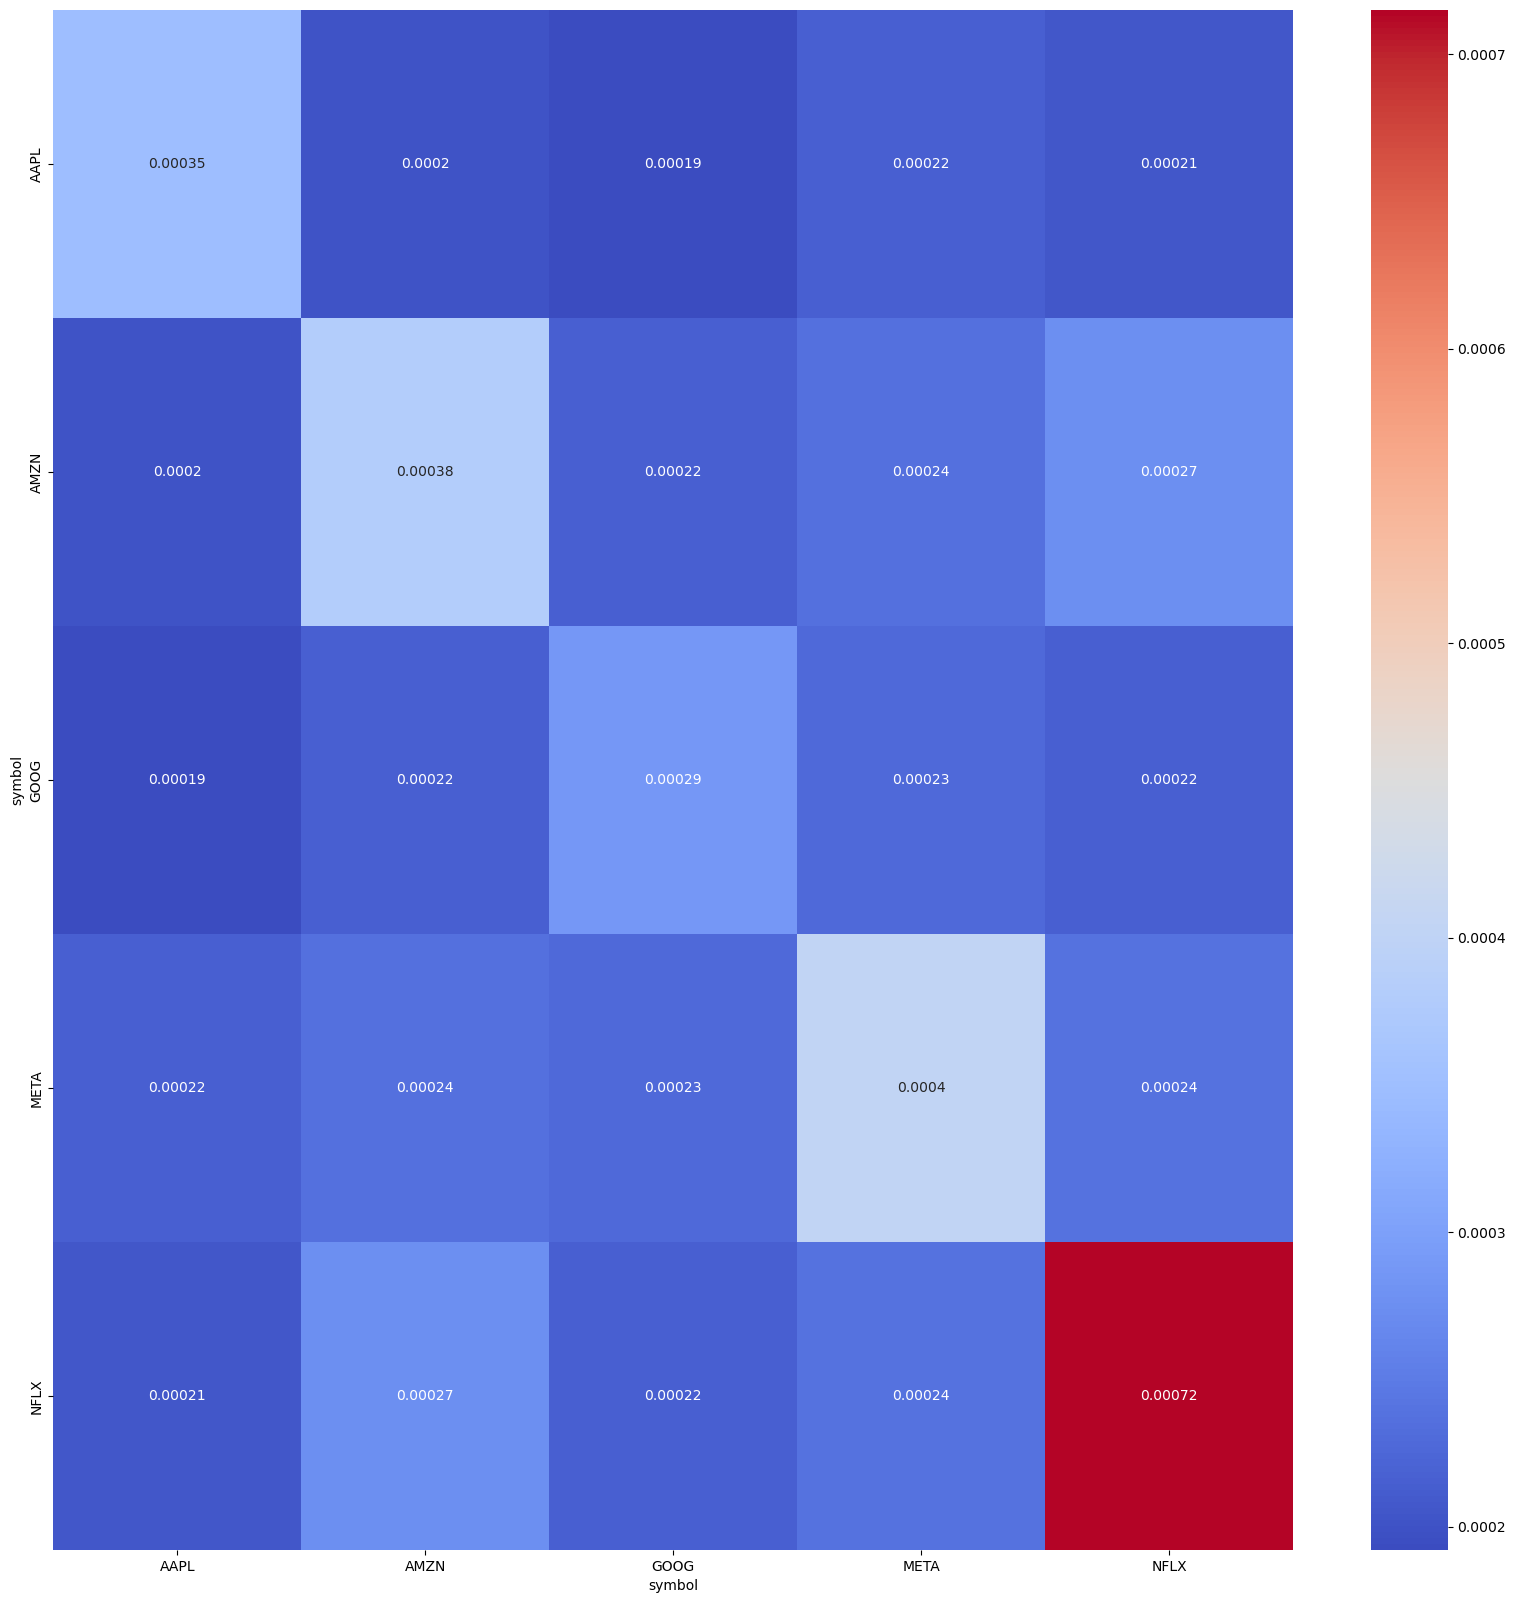

In [32]:
# We do a heatmap to represent the covariance matrix
plt.figure(figsize=(20,20))
sns.heatmap(cov_matrix,annot = True, cmap='coolwarm')

We observe that the covariance between the different stocks are very low

# Question 3
- Compute the skewness and excess kurtosis for the returns for each of these stocks. Do the daily stock returns have a Normal distribution?

In [38]:
from scipy.stats import skew, kurtosis

In [39]:
# We calculate the skewness
skewness=(stocks_returns
  .groupby("symbol")["ret"].apply(skew))

In [40]:
skewness

symbol
AAPL   -0.082901
AMZN    0.758752
GOOG    0.517319
META   -0.329613
NFLX    0.681363
Name: ret, dtype: float64

In [41]:
# We calculate the Kurtosis
kurt=(stocks_returns
  .groupby("symbol")["ret"].apply(kurtosis))

In [42]:
kurt

symbol
AAPL     6.584449
AMZN     7.171822
GOOG    10.394846
META    11.997574
NFLX     7.322442
Name: ret, dtype: float64

In [43]:
# We update the dataframe
df_result['Skewness']=list(skewness)
df_result['Kurtosis']=list(kurt)   
df_result['Excess Kurtosis']= df_result['Kurtosis']-3
df_result=df_result.set_index('Symbol')
df_result

,Mean,STD,Variance,Skewness,Kurtosis,Excess Kurtosis
Symbol,,,,,,
AAPL,0.001289,0.018671,0.000349,-0.082901,6.584449,3.584449
AMZN,0.001757,0.019524,0.000381,0.758752,7.171822,4.171822
GOOG,0.000939,0.016966,0.000288,0.517319,10.394846,7.394846
META,0.001027,0.020073,0.000403,-0.329613,11.997574,8.997574
NFLX,0.001914,0.026742,0.000715,0.681363,7.322442,4.322442


A normal distribution has a skewness of 0 and an excess kurtosis of 0. It is not our case so this is not a normal distribution